> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset is a collection of 100k medical appointments from Brazil. Column names: PatientId, AppointmentID, Gender, ScheduleDay,AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show. This analysis seeks to understand what factors affects patients no show rate.

### Question(s) for Analysis
This analysis will attempt to answer the following questions:
<ol>
<li><a href="#q1">Do the amount of time between scheduling and appointment date increase no-shows?</a></li>
<li><a href="#q2">What day of the week has the highest number of no show appointments?</a></li>
<li><a href="#q3">Do patient's age impact the no show rate?</a></li>
<li><a href="#q4">What gender has the highest now show rate?</a></li>
</ol>

In [3]:
# import statements for all of the packages used in this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot visualizations inline
% matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
# Load appointments dataset.
df = pd.read_csv("./noshowappointments-kagglev2-may-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# Rows and column count.
df.shape

(110527, 14)

In [7]:
# Columns summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# Check for missing values and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Verify no null values
df.isnull().sum().any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a0cf58320>,
      dtype=object)

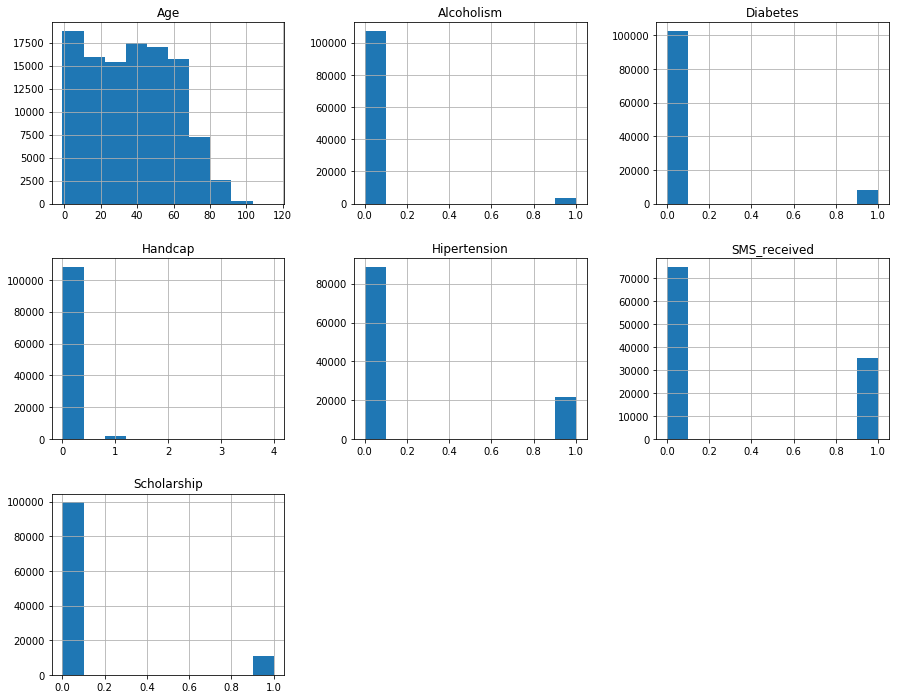

In [10]:
# Histogram of the columns
df.hist(column=['Age', 'Alcoholism', 'Diabetes', 'Handcap', 'Hipertension', 'SMS_received', 'Scholarship'], figsize = (15, 12))

In [11]:
# Number of unique patients.
df.PatientId.nunique()

62299

In [12]:
# Total numbers of unique appointments.
df.AppointmentID.nunique()

110527

In [13]:
# Check for duplications.
df.duplicated().sum()

0

The no-show appointment dataset contains **110527** rows and **14** columns.

There are no duplicate rows and no missing values.

The number of unique patient is **62299**.

At the next section:
* Drop the **AppointmentID** column it isn't usefull to the investigation.
* Correct misspelt **Hipertension** and **handcap** column names. 
* Rename **SMS_received** and **No-show** column names for consistency. 
* Rename all column names to lower caps to eliminate ambiguity.
* Convert **ScheduleDay** and **AppointmentDay** to DateTime type.
* Convert **Scholarship**, **Hipertension**, **Diabetes**, **Alcoholism**, **SMS_received**, **No-show** to boolean types.
* Convert **PatientId** to int64 for efficient lookup.
* Create a column **waittime** to hold the difference between appointment day and scheduled day.
* Add **dayofweek** column to hold the day of the week information corresponding to the week day that an appoinment occured.

The min age is **-1** and max age is **115**.
The age looks a little off, investigate further.


In [14]:
# Investigate row where age == -1
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
# Check if there is another entry for patient with age -1 using PatientId from above, if there is the patient's proper age
# should be extracted from that entry.
df[np.isclose(df['PatientId'], 4.659432e+14)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


No other entry for patient with age -1, assume mistake and approximate age to 0 for this row at the next section.

Futher investigation for patient with age 115.

In [16]:
# Query for patient with age 115.
df.query('Age == 115')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


There are two patients with age 115 and four appointments in total, with 3 appointments for a single patient. It cannot be the case that mistake was made 4 different times while inputting patient's age. 

In [17]:
# A look at the distribution of the number of days between schedule and appointment date. 
datedelta = ((pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay'])))
datedelta.describe()

count                      110527
mean       9 days 17:08:34.161960
std       15 days 05:51:27.891504
min             -7 days +10:10:40
25%      -1 days +15:41:31.500000
50%               3 days 11:22:18
75%       14 days 07:41:34.500000
max             178 days 13:19:01
dtype: object

Curiousy dataset for the difference between appointment day and scheduled day contains nagative values
which technically isn't possible.

In [18]:
datedelta.head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
dtype: timedelta64[ns]


### Data Cleaning

In [19]:
#Drop AppointmentID
df.drop("AppointmentID", axis=1, inplace=True)

# Confirm drop
print(df.columns)

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [20]:
# Rename columns
df.rename(columns = {"PatientId": "patientid", "Gender": "gender", "ScheduledDay": "scheduledday", "AppointmentDay": "appointmentday", "Age": "age", "Neighbourhood": "neighbourhood", "Scholarship": "scholarship", "Hipertension": "hypertension", "Diabetes": "diabetes", "Alcoholism": "alcoholism", "Handcap": "handicap", "SMS_received": "smsreceived", "No-show": "noshow"}, inplace=True)
# Confirm column rename
print(df.columns)

Index(['patientid', 'gender', 'scheduledday', 'appointmentday', 'age',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'smsreceived', 'noshow'],
      dtype='object')


In [21]:
# Patient with age -1 only has 1 entry. Change age -1 to 0.
df.age.replace({-1: 0}, inplace=True)

# Verify age change.
df[np.isclose(df['patientid'], 4.659432e+14)]

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
99832,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,0,ROMÃO,0,0,0,0,0,0,No


In [22]:
# Transform noshow column values.
df['noshow'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [117]:
# Transform multiple column types.
df = df.astype({'scholarship': bool, 'hypertension': bool, 'diabetes': bool, 
           'alcoholism': bool, 'smsreceived': bool, 'noshow': bool}, copy=False)

In [118]:
# Transform scheduleday and appointmentday columns to datetime type.
df[['scheduledday', 'appointmentday']] = df[['scheduledday', 'appointmentday']].apply(pd.to_datetime)

In [119]:
# Convert gender, neighbourhood and handicap to category type.
df[['gender', 'neighbourhood', 'handicap']] = df[['gender', 'neighbourhood', 'handicap']].astype('category')


In [120]:
# convert patientid to int64.
df['patientid'] = df['patientid'].astype('int64')

In [121]:
# Confirm column changes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patientid         110527 non-null int64
gender            110527 non-null category
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null int64
neighbourhood     110527 non-null category
scholarship       110527 non-null bool
hypertension      110527 non-null bool
diabetes          110527 non-null bool
alcoholism        110527 non-null bool
handicap          110527 non-null category
smsreceived       110527 non-null bool
noshow            110527 non-null bool
waittime          110527 non-null int64
dayofweek         110527 non-null object
dtypes: bool(6), category(3), datetime64[ns, UTC](2), int64(3), object(1)
memory usage: 6.0+ MB


In [122]:
# Create waittime column to hold the difference between appointmentday and scheduledday
df['waittime'] = ((df['appointmentday'].dt.date - df['scheduledday'].dt.date).dt.days)

Investigate the new waittime column.

In [123]:
df['waittime'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waittime, dtype: float64

Curiousy dataset for the difference between appointment day and scheduled day contains nagative values
which technically isn't possible.

In [124]:
# Number of wait days less than zero
len(df.query('waittime < 0'))

5

There are 5 entries where wait time is less than zero.

In [125]:
# A look at the data where waittime is less than zero.
df.query('waittime < 0').head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow,waittime,dayofweek
27033,7839272661752,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,False,False,False,False,1,False,True,-1,Monday
55226,7896293967868,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,False,False,False,False,1,False,True,-1,Tuesday
64175,24252258389979,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,False,False,False,False,0,False,True,-1,Wednesday
71533,998231581612122,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,False,False,False,False,0,False,True,-6,Thursday
72362,3787481966821,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,False,False,False,False,0,False,True,-1,Tuesday


Looks like error where they switch up the appointment date with scheduled date.

In [126]:
# Set wait time negative values to 0, since they must be errors.
df['waittime'] = df['waittime'].clip(lower=0)

In [127]:
# Verify changes.
len(df.query('waittime < 0'))

0

In [128]:
# Add dayofweek column to hold appointment week day.
df['dayofweek'] = df['appointmentday'].dt.day_name()

# Confirm that column has been added.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patientid         110527 non-null int64
gender            110527 non-null category
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null int64
neighbourhood     110527 non-null category
scholarship       110527 non-null bool
hypertension      110527 non-null bool
diabetes          110527 non-null bool
alcoholism        110527 non-null bool
handicap          110527 non-null category
smsreceived       110527 non-null bool
noshow            110527 non-null bool
waittime          110527 non-null int64
dayofweek         110527 non-null object
dtypes: bool(6), category(3), datetime64[ns, UTC](2), int64(3), object(1)
memory usage: 6.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Do the amount of time between scheduling and appointment date increase no-shows?

In [151]:
# barplot calls seaborn's barplot function to show point estimates.
def barplot(x, y, xlabel, ylabel, title, hue=None,  palette=None, ylim=None, order=None):
    graph = sns.barplot(x = x, y = y, palette=palette, order = order)
    graph.set(xlabel = xlabel, ylabel = ylabel, title = title, ylim=ylim)
    return graph

In [152]:
# Function to plot histogram.
def histgram(df, column, ylabel, title, xlabel_fontsize=None, ylabel_fontsize=None, title_fontsize=None):
    plt.hist(df);
    plt.title(title, fontsize=title_fontsize)
    plt.xlabel(column, fontsize=xlabel_fontsize);
    plt.ylabel(ylabel, fontsize=ylabel_fontsize);
    return plt.gca()

In [131]:
# Plot percentage distribuiton on a pie chart
def plot_pie(df, labels, title, title_fontsize=None):
    d = (df.value_counts(normalize=True) * 100)
    ax = d.plot.pie(autopct='%1.1f%%', labels=labels, startangle=0, figsize=(5, 5))
    ax.set_ylabel('')
    plt.title(title, fontsize=title_fontsize)

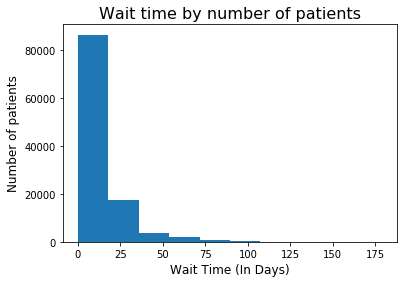

In [132]:
df_waittime_noshow = df[['waittime', 'noshow']]
ax = histgram(df_waittime_noshow['waittime'],"Wait Time (In Days)", "Number of patients", "Wait time by number of patients", xlabel_fontsize = 12, ylabel_fontsize = 12, title_fontsize = 16 )

In [133]:
ax.patches[0].get_width()

17.9

In [134]:
ax.patches[0].get_height()

86539.0

Bulk of the patients (86539) waited for 0 to 17.9 days between schedule date and appointment date.

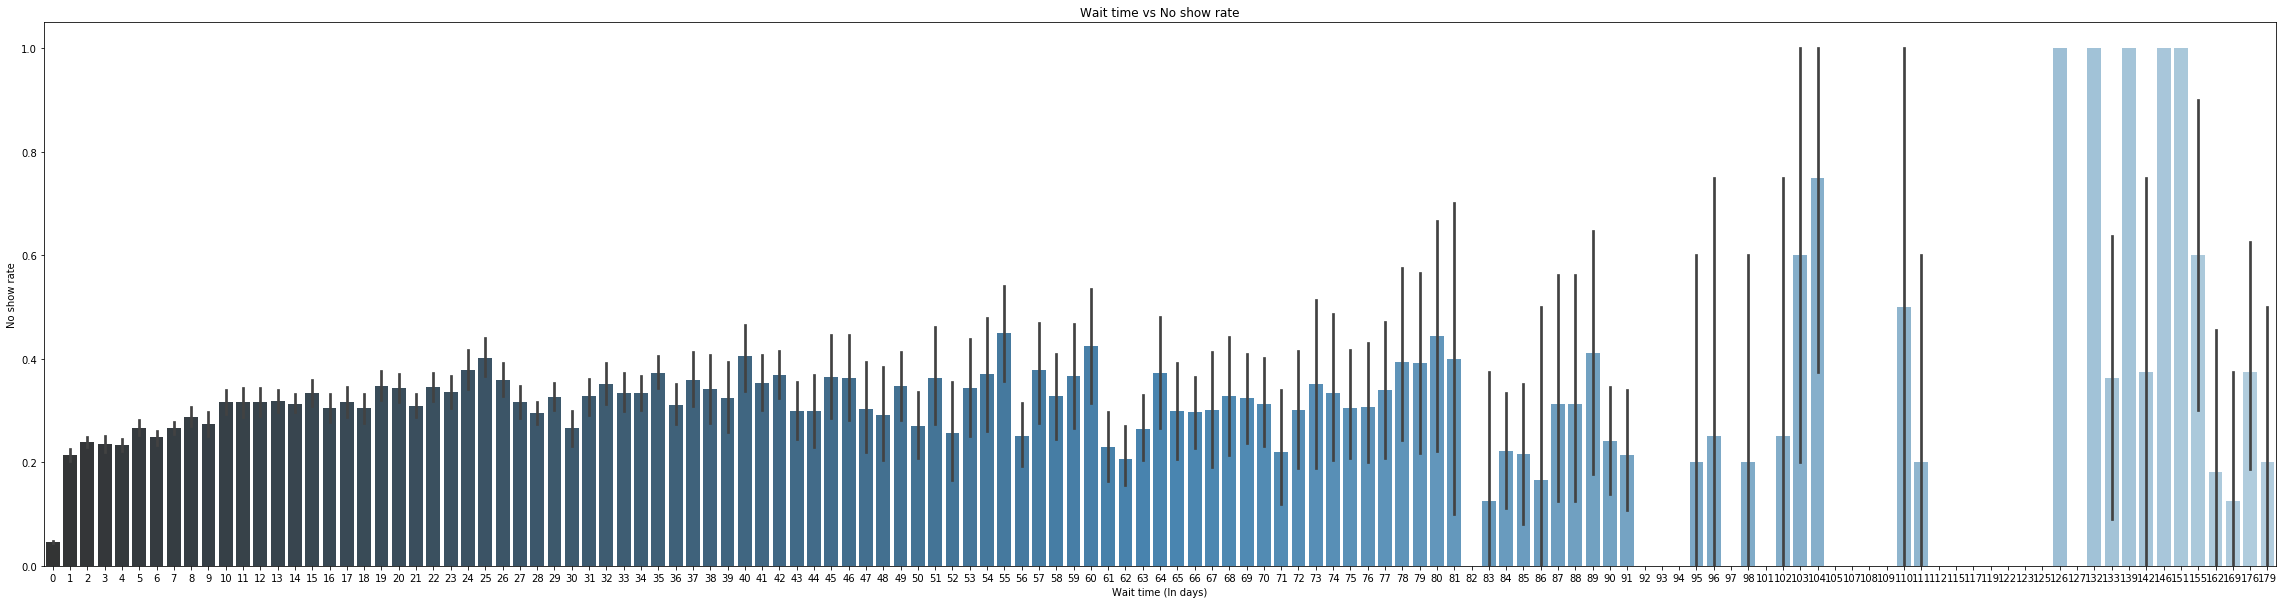

In [153]:
plt.figure(figsize=(40, 10))
barplot(df['waittime'], df['noshow'], 'Wait time (In days)', 'No show rate','Wait time vs No show rate',  palette="Blues_d")
plt.show()

Bar plot shows that the no show rate is lowest for scheduling and appointment  happening the same day. It shows a steady increase of no show rate for the first 25 days.

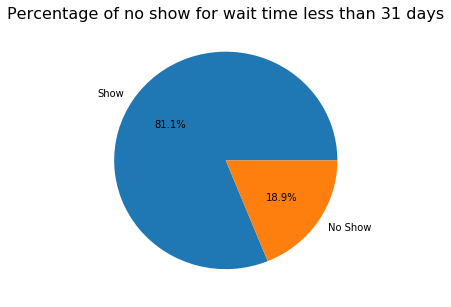

In [189]:
# Pie chart of percentage of no shows for wait timeless than a month.
plot_pie(df_waittime_noshow[(df_waittime_noshow['waittime'] < 31)]['noshow'], ['Show', 'No Show'], 'Percentage of no show for wait time less than 31 days', title_fontsize=16)

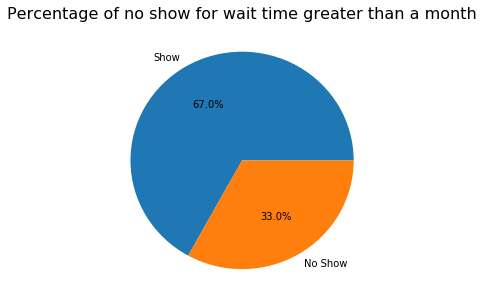

In [190]:
# Pie chart of percentage of no shows for wait greater than a month.
plot_pie(df_waittime_noshow[(df_waittime_noshow['waittime'] > 31)]['noshow'], ['Show', 'No Show'], 'Percentage of no show for wait time greater than a month', title_fontsize=16)

There is a 14.1 percent increase for scheduling to appointment intervals greater than one month, compared to intervals equall or less than a month.

### What day of the week has the highest number of no show appointments?

In [167]:
# cout plot calls searborns countplot function to plot bar charts with the supplied variables.
def countplot(df, x, xlabel, ylabel, title, order=None):
    g = sns.countplot(data = df, x = x, order = order)
    g.set(xlabel=xlabel, ylabel=ylabel, title=title)
    
    

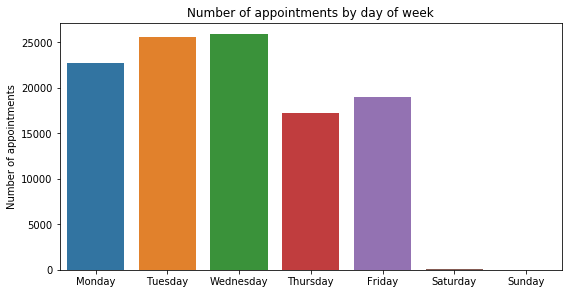

In [168]:
# Number of appointments by day of the week.
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
countplot(df, df['dayofweek'], "", "Number of appointments", "Number of appointments by day of week", order=day_order)

The number of appointments is highest on Tuesdays and wednesdays, least number of appointments are booked for thursdays. 
Appointments on saturdays are very small and will be ignored.  

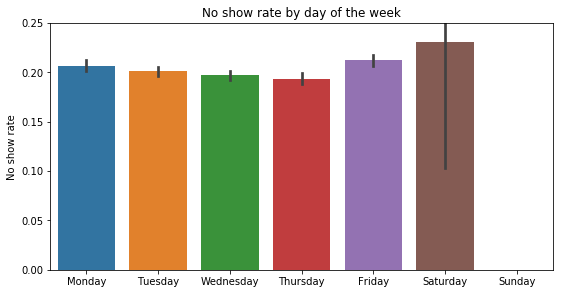

In [158]:
# Plot no show rate by day of the week.
plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
barplot(df['dayofweek'],  df['noshow'], "", "No show rate", "No show rate by day of the week", order=day_order, ylim=(0, 0.25))

In [198]:
# No show values grouped by week day.
df.noshow.groupby(df['dayofweek']).value_counts()

dayofweek  noshow
Friday     False     14982
           True       4037
Monday     False     18025
           True       4690
Saturday   False        30
           True          9
Thursday   False     13909
           True       3338
Tuesday    False     20488
           True       5152
Wednesday  False     20774
           True       5093
Name: noshow, dtype: int64

The highest rate of no show appoinments occurs on Friday and Mondays, and the least no show appointments occurs on Thursdays.
We are ignoring Saturdays since the number of bookings on that day is negligible.

### Do patient's age impact the no show rate?

In [172]:
# total Number of no shows.
df.groupby('noshow').count()['age']

noshow
False    88208
True     22319
Name: age, dtype: int64

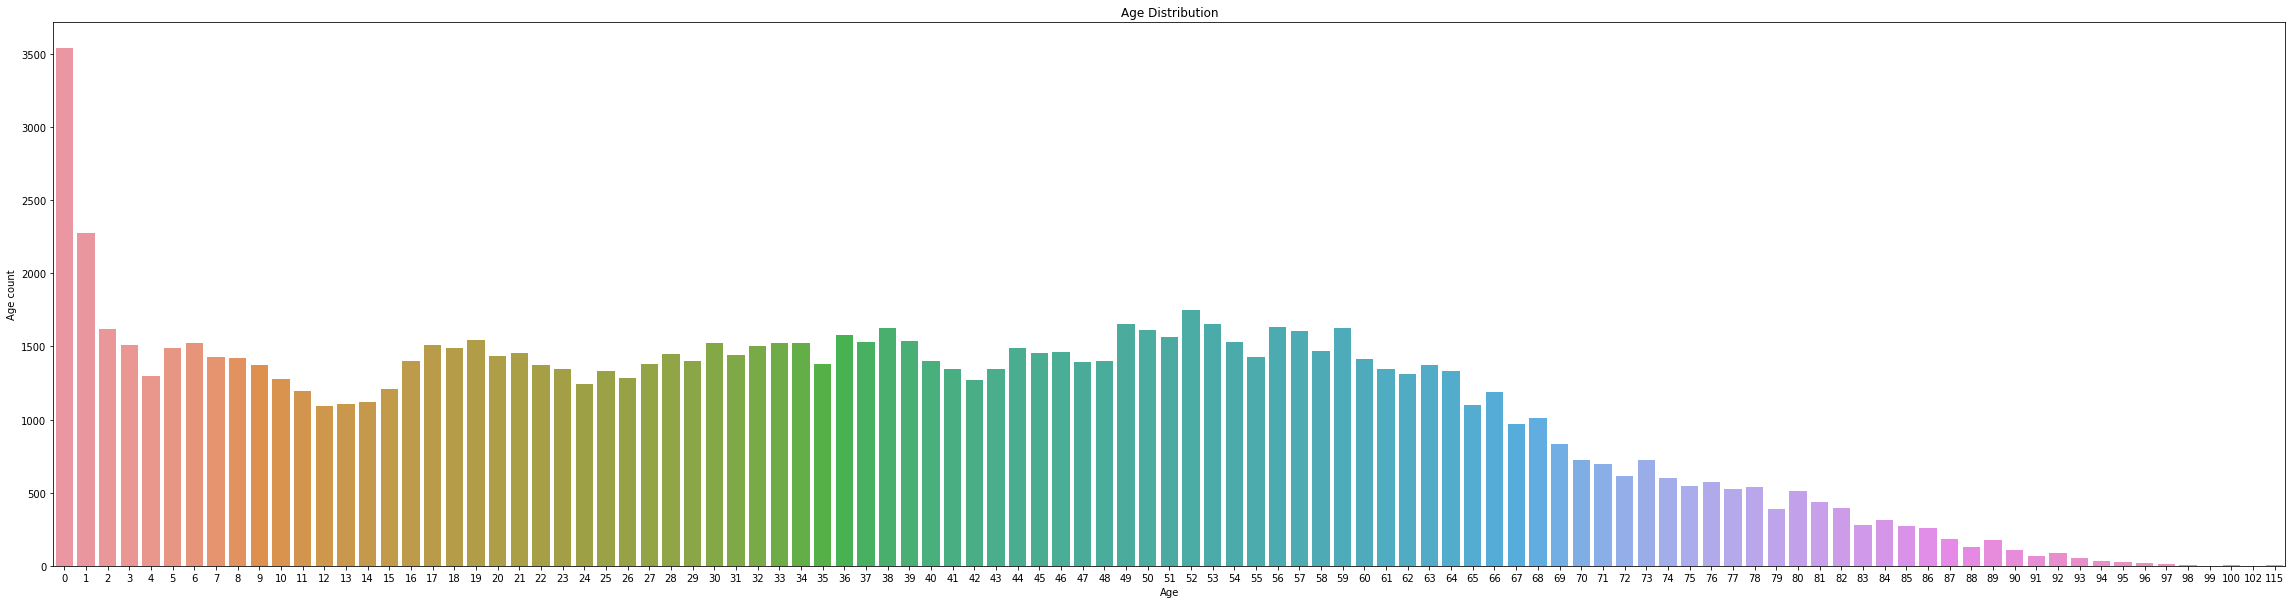

In [171]:
# bar plot of age distribution.
plt.figure(figsize=(40, 10))
countplot(df, df['age'], "Age", "Age count", "Age Distribution")

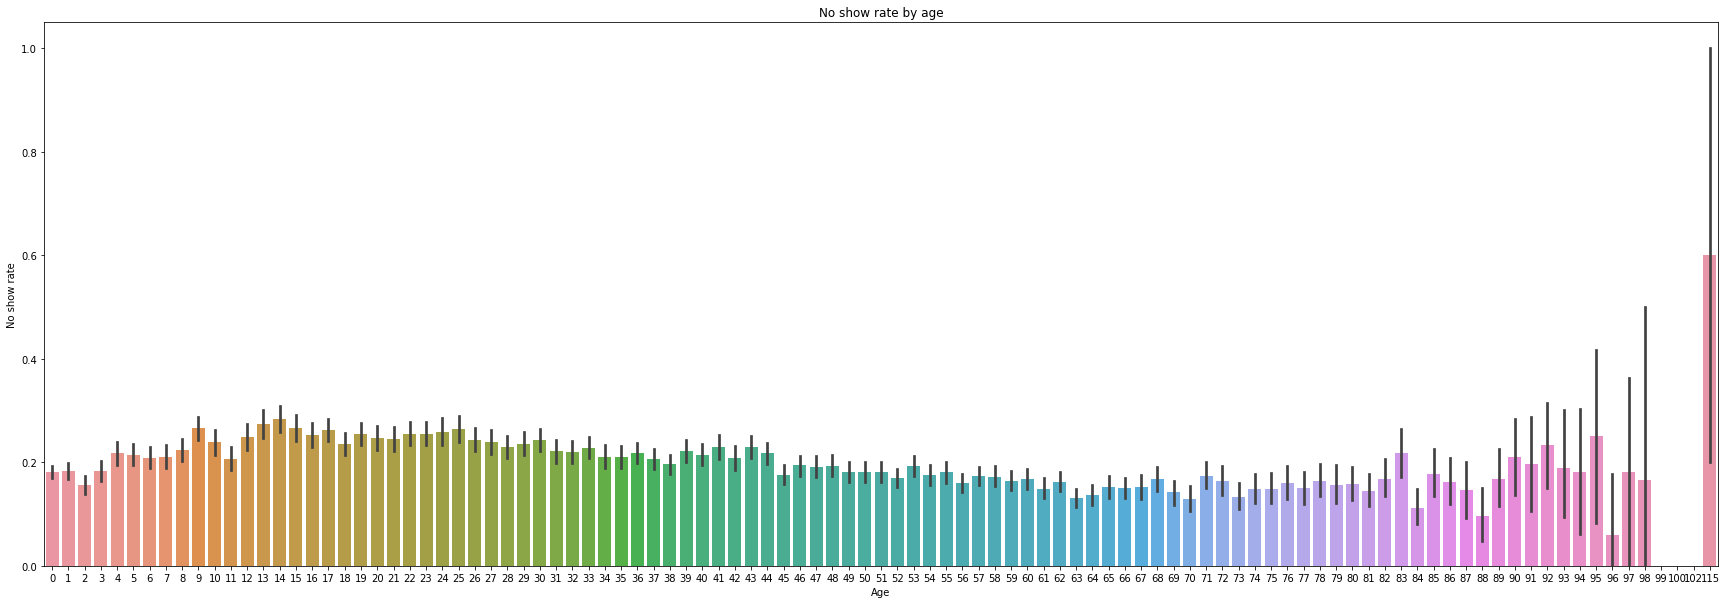

In [163]:
# bar plot of no show rate by age.
plt.figure(figsize=(30, 10))
barplot(df['age'],  df['noshow'], "Age", "No show rate", "No show rate by age")

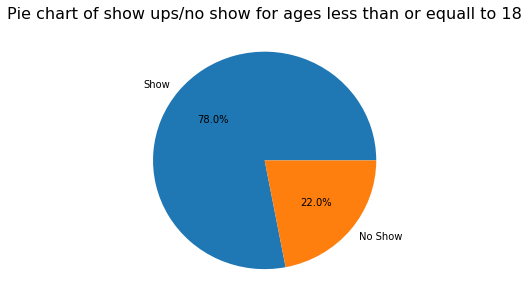

In [173]:
# Pie chart of percentage of no shows for ages less than or equall to 18.
plot_pie(df[(df['age'] <= 18)]['noshow'], ['Show', 'No Show'], 'Percentage of no show for ages less than or equall to 18', title_fontsize=16)

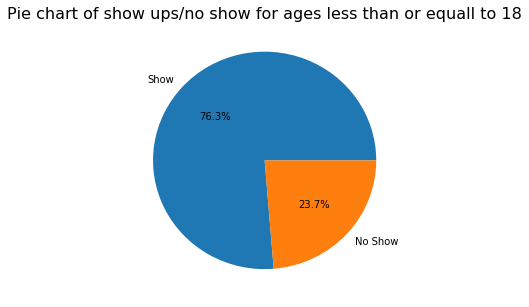

In [177]:
# Pie chart of percentage of no shows for ages less than 18  and equall to 36.
plot_pie(df[(df['age'] > 18 ) & (df['age'] <= 36)]['noshow'], ['Show', 'No Show'], 'Percentage of no show for ages between 18 and 36', title_fontsize=16)

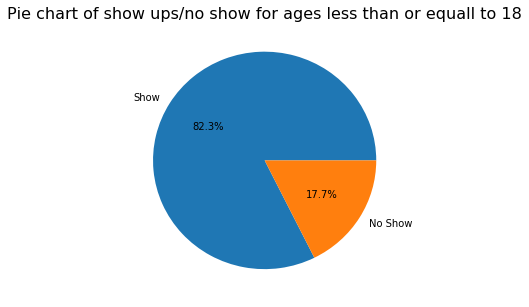

In [178]:
# Pie chart of percentage of no shows for ages greater than 36.
plot_pie(df[(df['age'] > 36 )]['noshow'], ['Show', 'No Show'], 'Percentage of no show for ages greater than 36', title_fontsize=16)

The no show rates is highest among young adults/youths aged 18 - 36 and lowest amongst seniors older than 36.

### What gender has the highest now show rate?

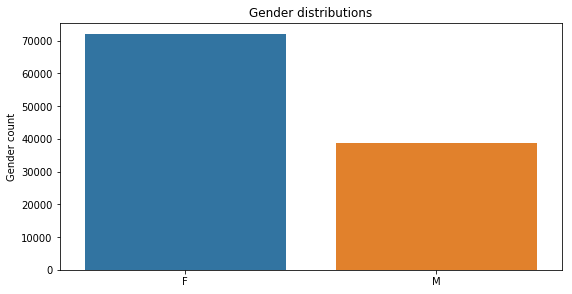

In [179]:
# Plot a bar chart of showing gender count.
plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
countplot(df, df['gender'], "", "Gender count", "Gender distributions")

In [ ]:
There are more female patients than male.

In [181]:
# Get the exact number of male and female patients.
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

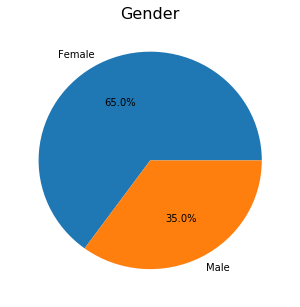

In [182]:
# Plot percentage of male and female patients.
plot_pie(df['gender'], ['Female', 'Male'], 'Gender', title_fontsize=16)

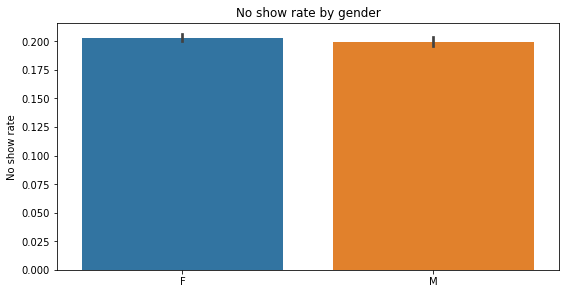

In [184]:
# Bar chart of gender no show rate
plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
barplot(df['gender'],  df['noshow'], "", "No show rate", "No show rate by gender")

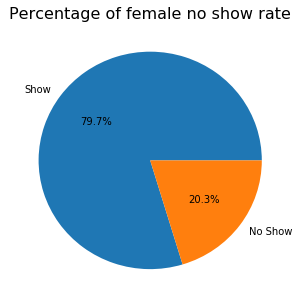

In [187]:
# Pie chart of female no show rate.
plot_pie(df[(df['gender'] == 'F' )]['noshow'], ['Show', 'No Show'], 'Percentage of female no show rate', title_fontsize=16)

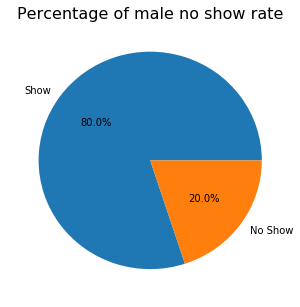

In [188]:
# Pie chart of male no show rate.
plot_pie(df[(df['gender'] == 'M' )]['noshow'], ['Show', 'No Show'], 'Percentage of male no show rate', title_fontsize=16)

There is no significant difference between male and female no show rate. Male and Female genders shows approximately equal no show rate.

<a id='conclusions'></a>
## Conclusions
<a id='q1'></a>
##### Q1. Do the amount of time between scheduling and appointment date increase no-shows?
Yes the no show rate increase as amount of time between when an appointment is scheduled and the appointment date increase. This trend is more visible in the first 25 days.
<a id='q2'></a>
##### Q2. What day of the week has the highest number of no show appointments?
Highest amount of no show appointments happens on Mondays and fridays.
<a id='q3'></a>
##### Q3. Do patient's age impact the no show rate?
Yes the pateints age affects no show appointment rate. No show rates is highest among young adults/youths aged 18 - 36 and lowest amongst seniors older than 36.
<a id='q4'></a>
##### Q4. What gender has the highest now show rate?
There is no difference between female and male no show rates. The female maintain a no show rate of 20.3% and male maintain a no show rate of 20.0%.

#### Challenges and limitations
1. There was no clearly defined age categories for the country where the data was collected.
2. The dataset covers a short period of time so there may be other variables that may impact no show rate at that time. e.g ecomony, weather e.t.c.
3. 

In [199]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0